## FAI - Project 

In [1]:
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

#### Data import and data checks

In [5]:
data_landmarks = pd.read_csv("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/list_landmarks_align_celeba.csv")

In [6]:
folder_path = "C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/img_align_celeba/img_align_celeba/"

In [7]:
img_arr_1 = cv2.imread("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/img_align_celeba/img_align_celeba/000001.jpg")
img_arr_10 = cv2.imread("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/img_align_celeba/img_align_celeba/000010.jpg")
img_arr_25 = cv2.imread("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/img_align_celeba/img_align_celeba/000025.jpg")
img_arr_40 = cv2.imread("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/img_align_celeba/img_align_celeba/000040.jpg")
img_arr_60 = cv2.imread("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/img_align_celeba/img_align_celeba/000060.jpg")

In [8]:
data_landmarks.shape

(202599, 11)

In [9]:
data_landmarks.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [10]:
data_landmarks.set_index('image_id', inplace = True)

In [11]:
img_arr_1.shape

(218, 178, 3)

In [12]:
img_arr_1

array([[[194, 231, 253],
        [194, 231, 253],
        [194, 231, 253],
        ...,
        [216, 228, 246],
        [223, 237, 255],
        [222, 238, 254]],

       [[194, 231, 253],
        [194, 231, 253],
        [194, 231, 253],
        ...,
        [218, 230, 248],
        [223, 237, 255],
        [222, 238, 254]],

       [[194, 231, 253],
        [194, 231, 253],
        [194, 231, 253],
        ...,
        [220, 232, 250],
        [224, 238, 255],
        [223, 239, 255]],

       ...,

       [[ 26,  74, 140],
        [  1,  49, 115],
        [ 33,  78, 146],
        ...,
        [ 28,  55, 122],
        [ 30,  56, 123],
        [ 30,  56, 122]],

       [[ 15,  62, 130],
        [ 23,  70, 138],
        [ 53,  98, 166],
        ...,
        [ 20,  49, 118],
        [ 24,  50, 120],
        [ 24,  51, 118]],

       [[ 53, 100, 168],
        [ 89, 136, 204],
        [132, 177, 245],
        ...,
        [ 20,  49, 118],
        [ 24,  50, 120],
        [ 24,  50, 120]]

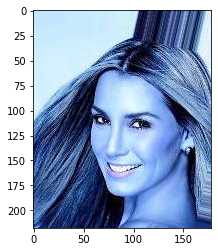

In [13]:
plt.imshow(img_arr_1)

In [14]:
img_arr_1.max()

255

In [15]:
img_arr_1.min()

0

In [16]:
data_attributes = pd.read_csv("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/list_attr_celeba.csv")

In [17]:
data_attributes.shape

(202599, 41)

In [18]:
data_attributes.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [19]:
data_attributes.dtypes

image_id               object
5_o_Clock_Shadow        int64
Arched_Eyebrows         int64
Attractive              int64
Bags_Under_Eyes         int64
Bald                    int64
Bangs                   int64
Big_Lips                int64
Big_Nose                int64
Black_Hair              int64
Blond_Hair              int64
Blurry                  int64
Brown_Hair              int64
Bushy_Eyebrows          int64
Chubby                  int64
Double_Chin             int64
Eyeglasses              int64
Goatee                  int64
Gray_Hair               int64
Heavy_Makeup            int64
High_Cheekbones         int64
Male                    int64
Mouth_Slightly_Open     int64
Mustache                int64
Narrow_Eyes             int64
No_Beard                int64
Oval_Face               int64
Pale_Skin               int64
Pointy_Nose             int64
Receding_Hairline       int64
Rosy_Cheeks             int64
Sideburns               int64
Smiling                 int64
Straight_H

In [20]:
data_attributes['Male'].unique()

array([-1,  1], dtype=int64)

In [21]:
data_attributes.set_index('image_id', inplace = True)

In [22]:
data_attributes.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [23]:
data_attributes.index[0]

'000001.jpg'

In [24]:
data_attributes.loc['000001.jpg', 'Male'] 

-1

Text(0.5, 1.0, 'Male: -1')

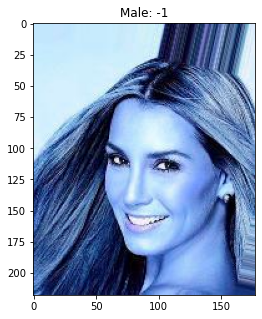

In [25]:
plt.figure(figsize = (5,5))
plt.imshow(img_arr_1)
plt.title('Male: {}'.format(data_attributes.loc['000001.jpg']['Male']))

Text(0.5, 1.0, 'Male: -1')

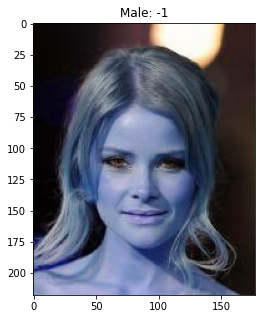

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(img_arr_10)
plt.title('Male: {}'.format(data_attributes.loc['000010.jpg']['Male']))

Text(0.5, 1.0, 'Male: 1')

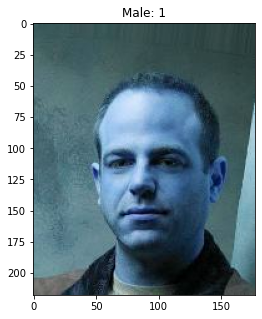

In [27]:
plt.figure(figsize = (5,5))
plt.imshow(img_arr_25)
plt.title('Male: {}'.format(data_attributes.loc['000025.jpg']['Male']))

Text(0.5, 1.0, 'Male: -1')

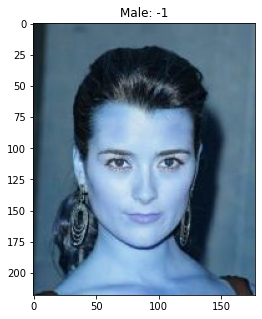

In [28]:
plt.figure(figsize = (5,5))
plt.imshow(img_arr_40)
plt.title('Male: {}'.format(data_attributes.loc['000040.jpg']['Male']))

Text(0.5, 1.0, 'Male: 1')

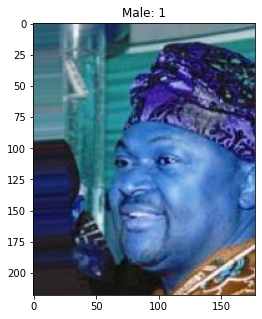

In [29]:
plt.figure(figsize = (5,5))
plt.imshow(img_arr_60)
plt.title('Male: {}'.format(data_attributes.loc['000060.jpg']['Male']))

In [30]:
data_partition = pd.read_csv("C:/Users/aditi/OneDrive/Desktop/NEU/NEU Fall 2021/CS 5100/Project/Data/list_eval_partition.csv")

In [31]:
data_partition.shape

(202599, 2)

In [32]:
data_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [33]:
data_partition.partition.unique()

array([0, 1, 2], dtype=int64)

In [34]:
data_partition.set_index('image_id', inplace = True)

In [35]:
data_par_ind = data_partition.merge(data_attributes[['Male']], how = 'inner', left_index = True, right_index = True)

In [36]:
data_par_ind.shape

(202599, 2)

In [37]:
data_par_ind.head()

,partition,Male
image_id,,
000001.jpg,0,-1
000002.jpg,0,-1
000003.jpg,0,1
000004.jpg,0,-1
000005.jpg,0,-1


In [38]:
def create_partition(data_type, sample_size):
    s = int(sample_size/2)
    if data_type == 'train':
        data_par_ind_fil = data_par_ind[data_par_ind['partition'] == 0]
    elif data_type == 'validate':
        data_par_ind_fil = data_par_ind[data_par_ind['partition'] == 1]
    else:
        data_par_ind_fil = data_par_ind[data_par_ind['partition'] == 2]
            
    data_male = data_par_ind_fil[data_par_ind_fil['Male'] == 1]
    data_final_1 = data_male.sample(n = s, random_state = 1)
    
    data_female = data_par_ind_fil[data_par_ind_fil['Male'] == -1]
    data_final_2 = data_female.sample(n = s, random_state = 1)
    
    data_final = data_final_1.append(data_final_2)
    
    return data_final

In [39]:
index_train = create_partition('train', 10000)
index_validate = create_partition('validate', 5000)
index_test = create_partition('test', 5000)

In [40]:
index_train.shape

(10000, 2)

In [41]:
index_train.head()

,partition,Male
image_id,,
058165.jpg,0,1
038864.jpg,0,1
109627.jpg,0,1
019001.jpg,0,1
081435.jpg,0,1


In [42]:
index_train.groupby(['Male'])['partition'].count()

Male
-1    5000
 1    5000
Name: partition, dtype: int64

In [43]:
index_validate.shape

(5000, 2)

In [44]:
index_validate.head()

,partition,Male
image_id,,
179489.jpg,1,1
175583.jpg,1,1
166624.jpg,1,1
166427.jpg,1,1
176753.jpg,1,1


In [45]:
index_validate.groupby(['Male'])['partition'].count()

Male
-1    2500
 1    2500
Name: partition, dtype: int64

In [46]:
index_test.shape

(5000, 2)

In [47]:
index_test.head()

,partition,Male
image_id,,
187443.jpg,2,1
188831.jpg,2,1
196643.jpg,2,1
199692.jpg,2,1
183418.jpg,2,1


In [48]:
index_test.groupby(['Male'])['partition'].count()

Male
-1    2500
 1    2500
Name: partition, dtype: int64

#### Implemeting basic CNN models

In [51]:
def load_image_features(img_indexes_data):
    X_1 = np.array([cv2.imread(folder_path + image) for image in img_indexes_data.index])
    X_3 = [cv2.split(image) for image in X_1]
    X_4 = np.array([cv2.merge([image[2], image[1], image[0]]) for image in X_3])
    X = X_4.reshape(X_4.shape[0], 218, 178, 3)
    y = np.array(img_indexes_data['Male'].tolist())
    
    return X, y

In [52]:
X_train, y_train = load_image_features(index_train)

In [53]:
X_train.shape

(10000, 218, 178, 3)

In [54]:
y_train.shape

(10000,)

In [55]:
y_train = np.where(y_train < 0, 0, y_train)

In [56]:
(unique, counts) = np.unique(y_train, return_counts=True)

In [57]:
np.asarray((unique, counts)).T

array([[   0, 5000],
       [   1, 5000]], dtype=int64)

In [58]:
X_validate, y_validate = load_image_features(index_validate)

In [59]:
X_validate.shape

(5000, 218, 178, 3)

In [60]:
y_validate.shape

(5000,)

In [61]:
y_validate = np.where(y_validate < 0, 0, y_validate)

In [62]:
(unique, counts) = np.unique(y_validate, return_counts=True)

In [63]:
np.asarray((unique, counts)).T

array([[   0, 2500],
       [   1, 2500]], dtype=int64)

In [64]:
X_test, y_test = load_image_features(index_test)

In [65]:
X_test.shape

(5000, 218, 178, 3)

In [66]:
y_test.shape

(5000,)

In [67]:
y_test = np.where(y_test < 0, 0, y_test)

In [68]:
np.asarray((unique, counts)).T

array([[   0, 2500],
       [   1, 2500]], dtype=int64)

In [69]:
#Normalise the image data

X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

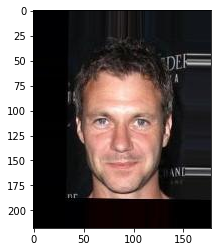

In [70]:
plt.imshow(X_validate[0])

#### Model - 1

In [ ]:
model_1 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_1.fit(X_train, y_train, epochs = 10)

In [ ]:
model_1.evaluate(X_validate, y_validate)

In [75]:
index_test = create_partition('test', 5000)

In [93]:
X_test_image, y_test_image = load_image_features(index_test.sample(n = 1))

In [94]:
a = model_1.predict(X_test_image)

if a[0][0] == 1:
    print("Male")
else:
    print("Female")

Female


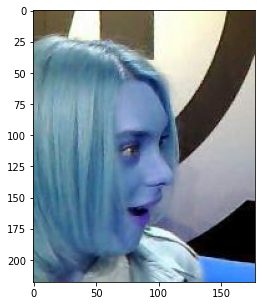

In [97]:
plt.figure(figsize = (5,5))
plt.imshow(X_test_image[0])

#### Model - 2

In [66]:
model_2 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [67]:
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [68]:
model_2.fit(X_train, y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 191s 605ms/step - loss: 0.4692 - accuracy: 0.7658
Epoch 2/10
313/313 [==============================] - 195s 624ms/step - loss: 0.1843 - accuracy: 0.9280
Epoch 3/10
313/313 [==============================] - 200s 638ms/step - loss: 0.1389 - accuracy: 0.9468
Epoch 4/10
313/313 [==============================] - 199s 635ms/step - loss: 0.1092 - accuracy: 0.9570
Epoch 5/10
313/313 [==============================] - 199s 636ms/step - loss: 0.0985 - accuracy: 0.9609
Epoch 6/10
313/313 [==============================] - 210s 671ms/step - loss: 0.0753 - accuracy: 0.9723
Epoch 7/10
313/313 [==============================] - 201s 643ms/step - loss: 0.0637 - accuracy: 0.9763
Epoch 8/10
313/313 [==============================] - 199s 637ms/step - loss: 0.0563 - accuracy: 0.9782
Epoch 9/10
313/313 [==============================] - 211s 674ms/step - loss: 0.0468 - accuracy: 0.9831
Epoch 10/10
313/313 [==============================] - 213s 681m

In [69]:
model_2.evaluate(X_validate, y_validate)

157/157 [==============================] - 28s 172ms/step - loss: 0.1371 - accuracy: 0.9544


[0.13713793456554413, 0.9544000029563904]

#### Model - 3

In [88]:
model_3 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size=(5, 5), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [89]:
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
model_3.fit(X_train, y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 184s 585ms/step - loss: 0.5137 - accuracy: 0.7291
Epoch 2/10
313/313 [==============================] - 181s 577ms/step - loss: 0.2902 - accuracy: 0.8799
Epoch 3/10
313/313 [==============================] - 187s 597ms/step - loss: 0.1787 - accuracy: 0.9293
Epoch 4/10
313/313 [==============================] - 1173s 4s/step - loss: 0.1378 - accuracy: 0.9447
Epoch 5/10
313/313 [==============================] - 199s 635ms/step - loss: 0.1131 - accuracy: 0.9569
Epoch 6/10
313/313 [==============================] - 210s 671ms/step - loss: 0.0914 - accuracy: 0.9639
Epoch 7/10
313/313 [==============================] - 214s 685ms/step - loss: 0.0924 - accuracy: 0.9650
Epoch 8/10
313/313 [==============================] - 225s 719ms/step - loss: 0.0670 - accuracy: 0.9744
Epoch 9/10
313/313 [==============================] - 237s 756ms/step - loss: 0.0572 - accuracy: 0.9793
Epoch 10/10
313/313 [==============================] - 231s 738ms/

In [79]:
model_3.evaluate(X_validate, y_validate)

157/157 [==============================] - 30s 184ms/step - loss: 0.1435 - accuracy: 0.9570


[0.14351040124893188, 0.9570000171661377]

##### To plot validation curve

In [90]:
history = model_3.fit(X_train, y_train, validation_data = (X_validate, y_validate), epochs = 10)

Epoch 1/10
313/313 [==============================] - 305s 961ms/step - loss: 0.4772 - accuracy: 0.7475 - val_loss: 0.2370 - val_accuracy: 0.9052
Epoch 2/10
313/313 [==============================] - 274s 874ms/step - loss: 0.1917 - accuracy: 0.9226 - val_loss: 0.1733 - val_accuracy: 0.9364
Epoch 3/10
313/313 [==============================] - 292s 933ms/step - loss: 0.1427 - accuracy: 0.9413 - val_loss: 0.1298 - val_accuracy: 0.9508
Epoch 4/10
313/313 [==============================] - 303s 968ms/step - loss: 0.1197 - accuracy: 0.9541 - val_loss: 0.1215 - val_accuracy: 0.9576
Epoch 5/10
313/313 [==============================] - 276s 883ms/step - loss: 0.0967 - accuracy: 0.9627 - val_loss: 0.1160 - val_accuracy: 0.9580
Epoch 6/10
313/313 [==============================] - 289s 924ms/step - loss: 0.0797 - accuracy: 0.9684 - val_loss: 0.1182 - val_accuracy: 0.9580
Epoch 7/10
313/313 [==============================] - 300s 959ms/step - loss: 0.0787 - accuracy: 0.9688 - val_loss: 0.1176 -

In [91]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

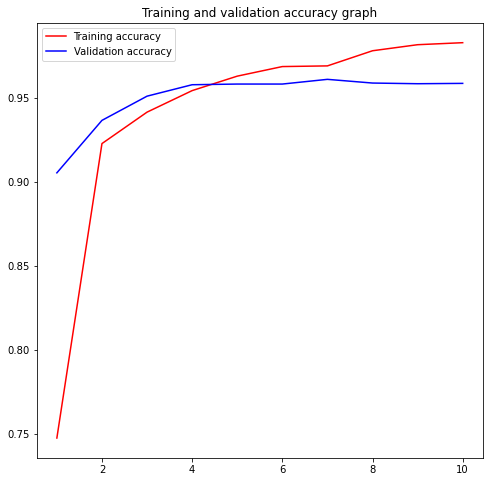

In [92]:
t_acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
t_loss = history.history['loss']
v_loss = history.history['val_loss']
plt.figure(figsize = (8, 8))
epochs = range(1, len(t_acc) + 1)
plt.plot(epochs, t_acc, 'r', label = 'Training accuracy')
plt.plot(epochs, v_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy graph')
plt.legend()

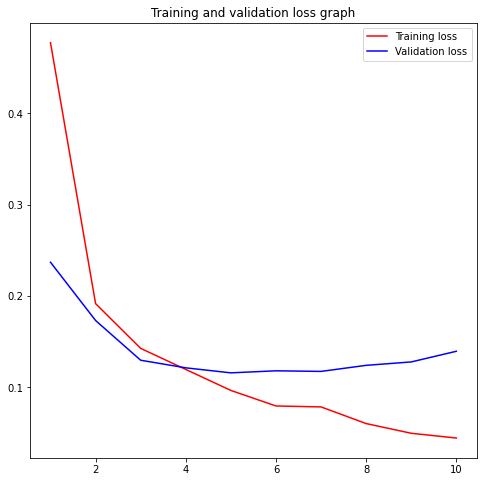

In [94]:
plt.figure(figsize = (8, 8))
plt.plot(epochs, t_loss, 'r', label='Training loss')
plt.plot(epochs, v_loss, 'b', label='Validation loss')
plt.title('Training and validation loss graph')
plt.legend()
plt.show()

#### Model - 4

In [69]:
model_4 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)),
        
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', strides = 4),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', strides = 4),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu', strides = 4),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [70]:
model_4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
h = model_4.fit(X_train, y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 80s 250ms/step - loss: 0.5584 - accuracy: 0.7075
Epoch 2/10
313/313 [==============================] - 75s 239ms/step - loss: 0.3325 - accuracy: 0.8576
Epoch 3/10
313/313 [==============================] - 73s 232ms/step - loss: 0.2571 - accuracy: 0.8934
Epoch 4/10
313/313 [==============================] - 73s 232ms/step - loss: 0.2197 - accuracy: 0.9099
Epoch 5/10
313/313 [==============================] - 75s 241ms/step - loss: 0.1925 - accuracy: 0.9229
Epoch 6/10
313/313 [==============================] - 81s 259ms/step - loss: 0.1740 - accuracy: 0.9292
Epoch 7/10
313/313 [==============================] - 79s 252ms/step - loss: 0.1523 - accuracy: 0.9378
Epoch 8/10
313/313 [==============================] - 82s 263ms/step - loss: 0.1361 - accuracy: 0.9465
Epoch 9/10
313/313 [==============================] - 81s 258ms/step - loss: 0.1168 - accuracy: 0.9541
Epoch 10/10
313/313 [==============================] - 79s 253ms/step - l

In [72]:
model_4.evaluate(X_validate, y_validate)

157/157 [==============================] - 16s 96ms/step - loss: 0.2210 - accuracy: 0.92001s


[0.2210397720336914, 0.9200000166893005]

#### Implemeting decision trees : Using provided features

In [80]:
data_attributes.shape

(202599, 40)

In [81]:
data_attributes.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [82]:
data_attributes.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [83]:
data_attributes = data_attributes.drop(['Heavy_Makeup', 'Wearing_Earrings', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie'], axis = 1)

In [84]:
input_data_t = index_train[['partition']].merge(data_attributes, how = 'inner', left_index = True, right_index = True)

In [85]:
input_data_t.shape

(10000, 36)

In [86]:
#input_data_t = input_data_t_1.merge(data_landmarks, how = 'inner', left_index = True, right_index = True)

In [87]:
input_data_t.shape

(10000, 36)

In [88]:
X_train_dt = input_data_t.drop(['Male', 'partition'], axis = 1)

In [89]:
X_train_dt.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Hat,Young
image_id,,,,,,,,,,,,,,,,,,,,,
058165.jpg,-1,-1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,1
038864.jpg,-1,-1,1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
109627.jpg,1,-1,1,1,-1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
019001.jpg,-1,-1,1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,1,-1,-1,-1,1
081435.jpg,1,-1,-1,1,-1,-1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [90]:
y_train_dt = index_train['Male']

In [91]:
input_data_v = index_validate[['partition']].merge(data_attributes, how = 'inner', left_index = True, right_index = True)

In [92]:
input_data_v.shape

(5000, 36)

In [93]:
#input_data_v = input_data_v_1.merge(data_landmarks, how = 'inner', left_index = True, right_index = True)

In [94]:
input_data_v.shape

(5000, 36)

In [95]:
X_validate_dt = input_data_v.drop(['Male', 'partition'], axis = 1)

In [96]:
X_validate_dt.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Hat,Young
image_id,,,,,,,,,,,,,,,,,,,,,
179489.jpg,1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,1
175583.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
166624.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
166427.jpg,-1,-1,1,1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,1
176753.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,1


In [97]:
y_validate_dt = index_validate['Male']

In [98]:
input_data_te = index_test[['partition']].merge(data_attributes, how = 'inner', left_index = True, right_index = True)

In [99]:
input_data_te.shape

(5000, 36)

In [100]:
#input_data_te = input_data_te_1.merge(data_landmarks, how = 'inner', left_index = True, right_index = True)

In [101]:
input_data_te.shape

(5000, 36)

In [102]:
X_test_dt = input_data_te.drop(['Male', 'partition'], axis = 1)

In [103]:
X_test_dt.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Hat,Young
image_id,,,,,,,,,,,,,,,,,,,,,
187443.jpg,-1,-1,1,1,-1,-1,1,1,1,-1,...,-1,-1,-1,-1,1,1,1,1,-1,1
188831.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
196643.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
199692.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,1
183418.jpg,1,-1,-1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,1,-1,1,-1,1


In [104]:
y_test_dt = index_test['Male']

In [105]:
dt = DecisionTreeClassifier()

In [106]:
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier()

In [107]:
dt.score(X_train_dt, y_train_dt)

0.9604

In [108]:
dt.score(X_validate_dt, y_validate_dt)

0.8508

In [109]:
dt.score(X_test_dt, y_test_dt)

0.8468

#### Tree Pruning

In [120]:
dt_prun = DecisionTreeClassifier(max_depth = 3)

In [121]:
dt_prun.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=3)

In [122]:
dt.score(X_train_dt, y_train_dt)

0.9604

In [123]:
dt.score(X_validate_dt, y_validate_dt)

0.8508

In [124]:
from sklearn import tree

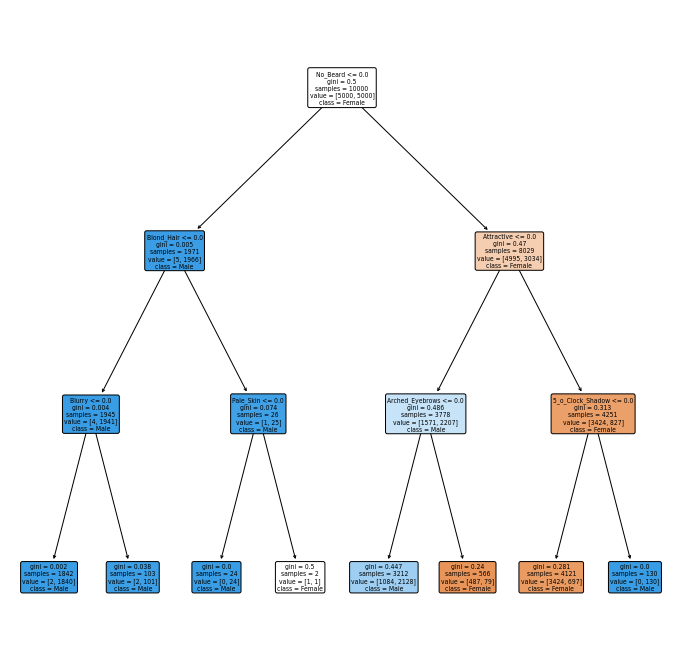

In [125]:
plt.figure(figsize=(12, 12))
tree.plot_tree(dt_prun, feature_names = X_train_dt.columns, class_names = ['Female', 'Male'], filled = True, rounded = True)
plt.savefig('tree.pdf')

#### Re - running model to see more performance metrics

#### Model 1

In [71]:
model_1 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [72]:
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
history_1 = model_1.fit(X_train, y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 260s 823ms/step - loss: 0.4109 - accuracy: 0.8249
Epoch 2/10
313/313 [==============================] - 261s 835ms/step - loss: 0.1635 - accuracy: 0.9379
Epoch 3/10
313/313 [==============================] - 247s 790ms/step - loss: 0.1066 - accuracy: 0.9603
Epoch 4/10
313/313 [==============================] - 246s 787ms/step - loss: 0.0574 - accuracy: 0.9777
Epoch 5/10
313/313 [==============================] - 234s 747ms/step - loss: 0.0375 - accuracy: 0.9855
Epoch 6/10
313/313 [==============================] - 235s 749ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 7/10
313/313 [==============================] - 248s 793ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 8/10
313/313 [==============================] - 239s 763ms/step - loss: 0.0211 - accuracy: 0.9919
Epoch 9/10
313/313 [==============================] - 247s 788ms/step - loss: 0.0279 - accuracy: 0.9904
Epoch 10/10
313/313 [==============================] - 247s 789m

In [74]:
model_1.evaluate(X_test, y_test)

157/157 [==============================] - 37s 215ms/step - loss: 0.3651 - accuracy: 0.9268


[0.3650987446308136, 0.926800012588501]

In [75]:
from sklearn.metrics import classification_report

y_pred = model_1.predict(X_test)

In [76]:
y_pred_bool = np.array([1 if a[0] > 0.5 else 0 for a in y_pred])

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2500
           1       0.91      0.94      0.93      2500

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



#### Model 2

In [70]:
model_2 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [71]:
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [72]:
history_2 = model_2.fit(X_train, y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 227s 718ms/step - loss: 0.4218 - accuracy: 0.8006
Epoch 2/10
313/313 [==============================] - 224s 715ms/step - loss: 0.1787 - accuracy: 0.9278
Epoch 3/10
313/313 [==============================] - 222s 709ms/step - loss: 0.1321 - accuracy: 0.9477
Epoch 4/10
313/313 [==============================] - 222s 710ms/step - loss: 0.1140 - accuracy: 0.9550
Epoch 5/10
313/313 [==============================] - 219s 701ms/step - loss: 0.1009 - accuracy: 0.9609
Epoch 6/10
313/313 [==============================] - 229s 731ms/step - loss: 0.0765 - accuracy: 0.9716
Epoch 7/10
313/313 [==============================] - 230s 733ms/step - loss: 0.0605 - accuracy: 0.9773
Epoch 8/10
313/313 [==============================] - 226s 723ms/step - loss: 0.0482 - accuracy: 0.9812
Epoch 9/10
313/313 [==============================] - 225s 719ms/step - loss: 0.0455 - accuracy: 0.9825
Epoch 10/10
313/313 [==============================] - 230s 733m

In [73]:
model_2.evaluate(X_test, y_test)

157/157 [==============================] - 33s 202ms/step - loss: 0.1779 - accuracy: 0.9486


[0.17791153490543365, 0.9485999941825867]

In [74]:
y_pred = model_2.predict(X_test)

In [75]:
y_pred_bool = np.array([1 if a[0] > 0.5 else 0 for a in y_pred])

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2500
           1       0.95      0.94      0.95      2500

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



#### Model 3

In [69]:
model_3 = models.Sequential([
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu', input_shape = (218, 178, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 128, kernel_size=(5, 5), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
    
    ])

In [70]:
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
history_3 = model_3.fit(X_train, y_train, epochs = 10)

Epoch 1/10
313/313 [==============================] - 238s 751ms/step - loss: 0.4559 - accuracy: 0.7685
Epoch 2/10
313/313 [==============================] - 235s 751ms/step - loss: 0.1974 - accuracy: 0.9207
Epoch 3/10
313/313 [==============================] - 233s 746ms/step - loss: 0.1491 - accuracy: 0.9427
Epoch 4/10
313/313 [==============================] - 235s 752ms/step - loss: 0.1240 - accuracy: 0.9549
Epoch 5/10
313/313 [==============================] - 239s 763ms/step - loss: 0.1116 - accuracy: 0.9567
Epoch 6/10
313/313 [==============================] - 236s 753ms/step - loss: 0.0938 - accuracy: 0.9638
Epoch 7/10
313/313 [==============================] - 233s 743ms/step - loss: 0.0808 - accuracy: 0.9700
Epoch 8/10
313/313 [==============================] - 232s 743ms/step - loss: 0.0694 - accuracy: 0.9736
Epoch 9/10
313/313 [==============================] - 238s 760ms/step - loss: 0.0543 - accuracy: 0.9789
Epoch 10/10
313/313 [==============================] - 234s 749m

In [72]:
model_3.evaluate(X_test, y_test)

157/157 [==============================] - 33s 203ms/step - loss: 0.1556 - accuracy: 0.9516


[0.15562748908996582, 0.9516000151634216]

In [75]:
from sklearn.metrics import classification_report

y_pred = model_3.predict(X_test)


In [76]:
y_pred_bool = np.array([1 if a[0] > 0.5 else 0 for a in y_pred])

print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2500
           1       0.95      0.95      0.95      2500

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

